In [1]:
import numpy as np
# numpy float 출력옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')
%matplotlib inline

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
# 랜덤에 의해 똑같은 결과를 재현하도록 seed값 고정
seed = 777
np.random.seed(seed)

In [5]:
def scale(train_data, scatter_show_YN=False, kdeplot_show_YN=False):    
    from sklearn.preprocessing import MinMaxScaler
    minMaxScaler = MinMaxScaler()
    %time print(minMaxScaler.fit(train_data))
    train_data_minMaxScaled =  pd.DataFrame(minMaxScaler.transform(train_data), columns=['x1', 'x2'])

    from sklearn.preprocessing import MaxAbsScaler
    maxAbsScaler = MaxAbsScaler()
    %time print(maxAbsScaler.fit(train_data))
    train_data_maxAbsScaled = pd.DataFrame(maxAbsScaler.transform(train_data), columns=['x1', 'x2'])

    from sklearn.preprocessing import StandardScaler
    standardScaler = StandardScaler()
    %time print(standardScaler.fit(train_data))
    train_data_standardScaled = pd.DataFrame(standardScaler.transform(train_data), columns=['x1', 'x2'])

    from sklearn.preprocessing import RobustScaler
    robustScaler = RobustScaler()
    %time print(robustScaler.fit(train_data))
    train_data_robustScaled = pd.DataFrame(robustScaler.transform(train_data), columns=['x1', 'x2'])

    if(kdeplot_show_YN is True):
        kdeplot_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled)    
    
    if(scatter_show_YN is True):
        scatter_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled)

In [6]:
def scatter_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled):    
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(19,4))
    scatter_sub_draw(sub_ax=ax[0], x=train_data['x1'], y=train_data['x2'],
                                  title='train_data', size=2, color1='k', color2='c')
    scatter_sub_draw(sub_ax=ax[1], x=train_data_minMaxScaled['x1'], y=train_data_minMaxScaled['x2'],
                                  title='train_data_minMaxScaled', size=2, color1='g', color2='c')
    scatter_sub_draw(sub_ax=ax[2], x=train_data_maxAbsScaled['x1'], y=train_data_maxAbsScaled['x2'],
                                  title='train_data_maxAbsScaled', size=2, color1='g', color2='c')
    scatter_sub_draw(sub_ax=ax[3], x=train_data_standardScaled['x1'], y=train_data_standardScaled['x2'],
                                  title='train_data_standardScaled', size=2, color1='g', color2='c')
    scatter_sub_draw(sub_ax=ax[4], x=train_data_robustScaled['x1'], y=train_data_robustScaled['x2'],
                                  title='train_data_robustScaled', size=2, color1='g', color2='c')
    
def scatter_sub_draw(sub_ax, x, y, title, size, color1, color2):
    sub_ax.scatter(x, y, s=size, color=color1)
    sub_ax.grid(True)
    sub_ax.set_title(title)
    sub_ax.set_xlabel(x.name)
    sub_ax.set_ylabel(y.name)
    # median  line draw
    sub_ax.axvline(x=x.median(), color=color2, linestyle='--', linewidth=0.5)
    sub_ax.axhline(y=y.median(), color=color2, linestyle='--', linewidth=0.5)

In [7]:
def kdeplot_show(train_data, train_data_minMaxScaled, train_data_maxAbsScaled, train_data_standardScaled, train_data_robustScaled):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(19,4))
    kdeplot_sub_draw(sub_ax=ax[0], x=train_data['x1'], y=train_data['x2'], 
                                  title='train_data', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[1], x=train_data_minMaxScaled['x1'], y=train_data_minMaxScaled['x2'], 
                                  title='train_data_minMaxScaled', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[2], x=train_data_maxAbsScaled['x1'], y=train_data_maxAbsScaled['x2'], 
                                  title='train_data_maxAbsScaled', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[3], x=train_data_standardScaled['x1'], y=train_data_standardScaled['x2'], 
                                  title='train_data_standardScaled', size=1, color1='r', color2='b')
    kdeplot_sub_draw(sub_ax=ax[4], x=train_data_robustScaled['x1'], y=train_data_robustScaled['x2'], 
                                  title='train_data_robustScaled', size=1, color1='r', color2='b')
    
def kdeplot_sub_draw(sub_ax, x, y, title, size, color1, color2):
    # sns.kdeplot: Fit and plot a univariate or bivariate kernel density estimate
    import seaborn as sns
    sub_ax.grid(True)
    sub_ax.set_title(title)
    sns.kdeplot(x, ax=sub_ax, shade=True, color=color1)
    sns.kdeplot(y, ax=sub_ax, shade=True, color=color2)
    # median  line draw
    sub_ax.axvline(x=x.median(), color=color1, linestyle='--', linewidth=0.5)
    sub_ax.axvline(x=y.median(), color=color2, linestyle='--', linewidth=0.5)

In [8]:
train_data = pd.DataFrame({
    'x1': np.random.randint(-100, 0, 10000).astype(float),
    'x2': np.random.randint(0, 500, 10000).astype(float)
})

In [9]:
train_data.describe()

,x1,x2
count,10000.000000,10000.000000
mean,-50.582200,246.323900
std,28.835034,144.785158
min,-100.000000,0.000000
25%,-75.000000,120.000000
50%,-51.000000,244.000000
75%,-26.000000,373.000000
max,-1.000000,499.000000


MinMaxScaler()
Wall time: 1.99 ms
MaxAbsScaler()
Wall time: 997 µs
StandardScaler()
Wall time: 997 µs
RobustScaler()
Wall time: 1.97 ms


findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothicBold'] not found. Falling back to DejaVu Sans.


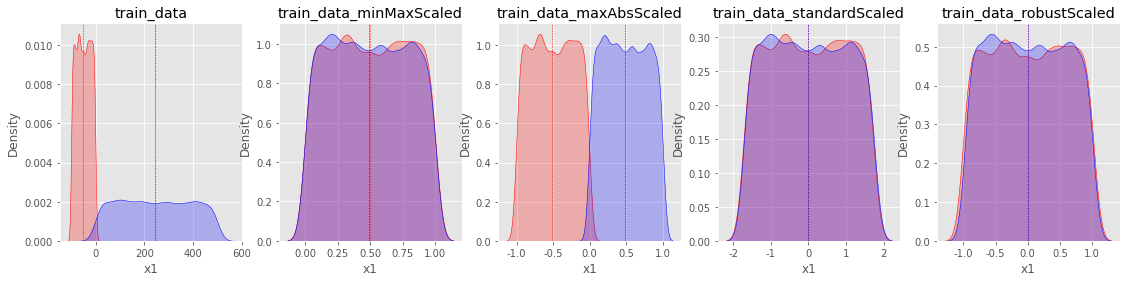

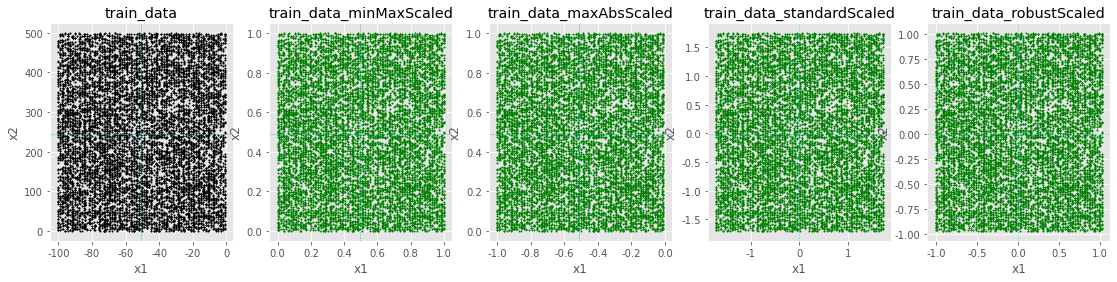

In [10]:
scale(train_data, scatter_show_YN=True, kdeplot_show_YN=True)

In [11]:
train_data = pd.DataFrame({
    'x1': np.random.normal(-50, 10, 10000),
    'x2': np.random.normal(50, 50, 10000),
})

In [12]:
train_data.describe()

,x1,x2
count,10000.000000,10000.000000
mean,-49.871424,50.023553
std,10.060103,49.594207
min,-85.854554,-146.200898
25%,-56.682810,16.510939
50%,-49.919186,50.107204
75%,-43.184152,83.938270
max,-12.001252,263.532908


MinMaxScaler()
Wall time: 1.96 ms
MaxAbsScaler()
Wall time: 2 ms
StandardScaler()
Wall time: 1.02 ms
RobustScaler()
Wall time: 2.02 ms


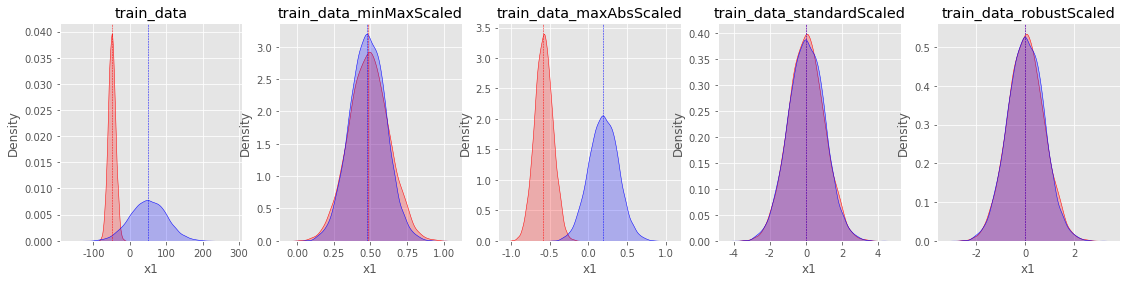

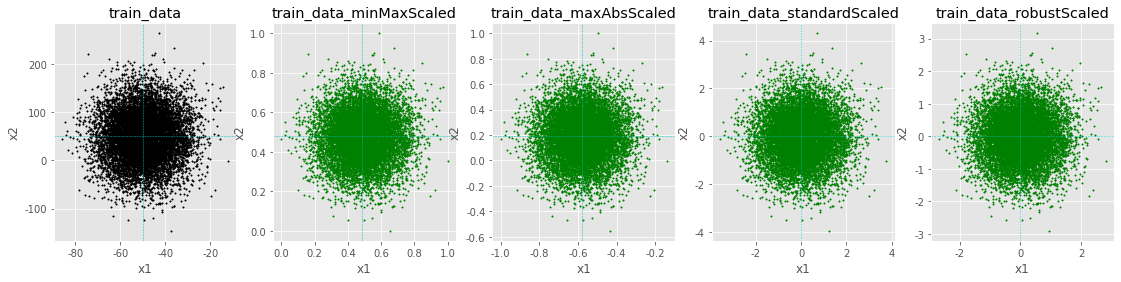

In [13]:
scale(train_data, scatter_show_YN=True, kdeplot_show_YN=True)

In [14]:
train_data = pd.DataFrame({
    'x1': np.random.chisquare(5, 10000) - 20.0,
    'x2': (np.random.chisquare(10, 10000) * -1) + 20.0
})

In [15]:
train_data.describe()

,x1,x2
count,10000.000000,10000.000000
mean,-14.980279,10.043810
std,3.159861,4.453538
min,-19.936398,-13.946156
25%,-17.309077,7.430752
50%,-15.639417,10.746427
75%,-13.337206,13.341255
max,7.796848,19.264584


MinMaxScaler()
Wall time: 998 µs
MaxAbsScaler()
Wall time: 1.99 ms
StandardScaler()
Wall time: 998 µs
RobustScaler()
Wall time: 2 ms


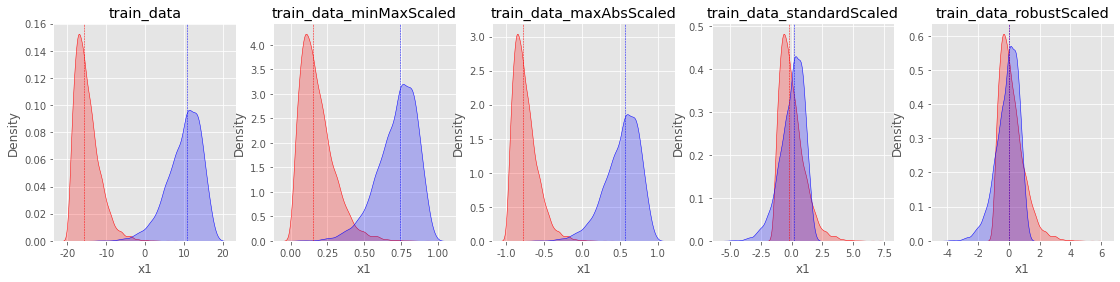

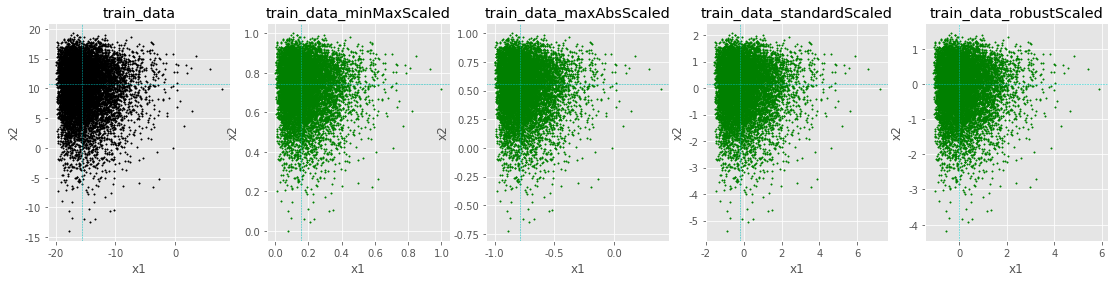

In [16]:
scale(train_data, scatter_show_YN=True, kdeplot_show_YN=True)

In [17]:
train_data = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 1, 9000), np.random.normal(40, 1, 1000)]),
    'x2': np.concatenate([np.random.normal(30, 2, 9000), np.random.normal(10, 4, 1000)])
})

In [18]:
train_data.describe()

,x1,x2
count,10000.000000,10000.000000
mean,21.997683,27.971379
std,6.095991,6.461501
min,16.340133,-2.028040
25%,19.397234,28.063327
50%,20.141968,29.694695
75%,20.965423,31.142263
max,43.098562,37.029612


In [ ]:
scale(train_data, scatter_show_YN=True, kdeplot_show_YN=True)

MinMaxScaler()
Wall time: 998 µs
MaxAbsScaler()
Wall time: 998 µs
StandardScaler()
Wall time: 1.98 ms
RobustScaler()
Wall time: 1.97 ms


In [ ]:
train_data = pd.DataFrame({
    'x1': np.concatenate([np.array([0] * 100), np.array([0] * 100), np.array([1] * 600), np.array([1] * 200)]),
    'x2': np.concatenate([np.array([0] * 100), np.array([1] * 100), np.array([0] * 700), np.array([1] * 100)])
})

In [ ]:
train_data.describe()

In [ ]:
scale(train_data, scatter_show_YN=True, kdeplot_show_YN=True)